In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import math
import pickle

# simulation code
from funwalk.proportions import p_mold,p_yeast,p_intermediate
from funwalk.hyphae import hyphal_walk
from funwalk.analytical import rmsd_yeast_state,rmsd_mold_state,rmsd 

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.pyplot import cm
plt.style.use('seaborn-paper')
paper_rc = {'lines.linewidth': 5}                  
sns.set_context("paper", rc = paper_rc)  
plt.rcParams["axes.titlesize"] = 22
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
np.random.seed(42)
from IPython.core.display import HTML
%matplotlib inline

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [2]:
#### Blastomyces dermatitidis (wt) #### 

#proportion (chnage) from 
temp = np.linspace(28,48,6)
pM = [1,.8,0,0,0,0]
pI = [0,0,.5,0, 0, 0]
pY = [0,0,0,.6,1,1]
stages = pd.DataFrame([pM,pI,pY],columns=temp,
                      index=['Mold','Intermediate','Yeast']).T

# grown at @ 37C
# Doubleing_Rate ~ 17.56 ± 0.57
# spores after 60 days ~ 1.9 x 106 spores/ml 
# Growth pdeudo hyphal (radius by day)
time = [0,7,16,36,46,60]
r_cm = [0,1.25,2,3.25,3.75,4]
timemap_ = {r_:t_ for t_,r_ in zip(time,r_cm)}


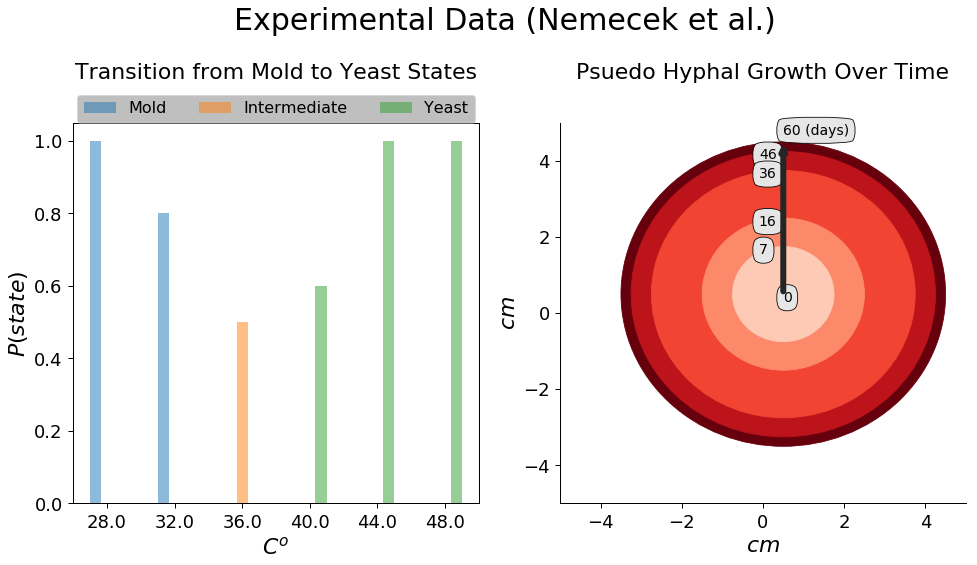

In [3]:
color=cm.Reds(np.linspace(0,1,len(r_cm)))
boxstyle = dict(boxstyle="round4,pad=.5", fc="0.9")
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,7)) # note we must use plt.subplots, not plt.subplot


stages.plot(kind='bar',ax=ax1,rot=0,alpha=.5,stacked=False)
ax1.legend(loc='upper center', 
                bbox_to_anchor=(.5, 1.095),
                prop={'size':16},
                fancybox=True, framealpha=0.5,ncol=3
                , markerscale=2, facecolor="grey")
ax1.set_xlabel('$C^{o}$')
ax1.set_ylabel('$P(state)$')
ax1.set_title('Transition from Mold to Yeast States',y=1.1)

for (i_,r_),c_ in zip(enumerate(r_cm[::-1]),color[::-1]):
    circle_ = plt.Circle((0.5, 0.5), r_, color=c_)
    if i_==len(r_cm)-1:
        ax2.annotate(str(int(timemap_[r_])),(0.49, 0.5+r_-.2),fontsize=14,bbox=boxstyle)
    elif i_==0:
        ax2.annotate(str(int(timemap_[r_]))+' (days)',(0.49, 0.5+r_+.2),fontsize=14,bbox=boxstyle)
    elif i_%3:
        ax2.annotate(str(int(timemap_[r_])),(-0.1, r_+.3),fontsize=14,bbox=boxstyle)
    elif i_%2:
        ax2.annotate(str(int(timemap_[r_])),(-0.1, r_+.3),fontsize=14,bbox=boxstyle)
    ax2.add_artist(circle_)
ax2.annotate("", xy=(.5, 0.52+(r_cm[-1])), xytext=(.5, .52),
            arrowprops=dict(arrowstyle="->",linewidth=6,color='#252525'))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('$cm$')
ax2.set_xlabel('$cm$')
ax2.set_title('Psuedo Hyphal Growth Over Time',y=1.1)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
plt.suptitle('Experimental Data (Nemecek et al.)',fontsize=30,y=1.11)
plt.savefig('figures/Fig_all_exp_data.png',dpi=300,bbox_inches = "tight")
plt.show()

### Two-State System Model of Dimorphism 





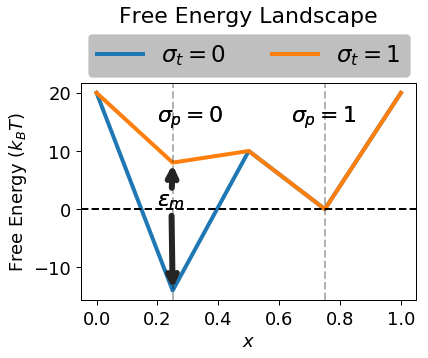

In [4]:
T0=36
T1=22
T2=44
Em_y = T2-T0
Em_m = T1-T0

for em_,lab_ in zip([Em_m,Em_y],['$\\sigma_{t}=0$','$\\sigma_{t}=1$']):

    y = [20, em_, 10, 0, 20]
    x = np.linspace(0,1,len(y))
    E = np.poly1d(np.polyfit(x, y, 4))
    x_lin = np.linspace(0, 1, 5)
    y_lin = E(x_lin)
    plt.plot(x_lin,E(x_lin), linewidth=4,label=lab_)
    plt.ylabel('Free Energy ($k_{B}T$)', fontsize=18)
    plt.xlabel('$x$', fontsize=18)
    plt.annotate("$\\epsilon_{m}$", xy=(.25, em_), xytext=(.2, 0.5),
                arrowprops=dict(arrowstyle="->",
                linewidth=6,color='#252525'),fontsize=22)
    plt.annotate("$\\sigma_{p}=0$",xy=(.2, 15), 
                 xytext=(.2, 15),fontsize=22)
    plt.annotate("$\\sigma_{p}=1$",xy=(.64, 15), 
                 xytext=(.64, 15),fontsize=22)

plt.axhline(0,lw=2,ls='--',c='black')
plt.axvline(.25,lw=2,ls='--',c='black',alpha=.3)
plt.axvline(.75,lw=2,ls='--',c='black',alpha=.3)
plt.legend(loc='upper center', 
                bbox_to_anchor=(.5, 1.28),
                prop={'size':23},
                fancybox=True, framealpha=0.5,ncol=2
                , markerscale=2, facecolor="grey")
plt.title('Free Energy Landscape',y=1.25,fontsize=22)
plt.savefig('figures/energy_landscape.png',dpi=300, bbox_inches = "tight")
plt.show()

In [5]:
from sklearn.metrics import r2_score

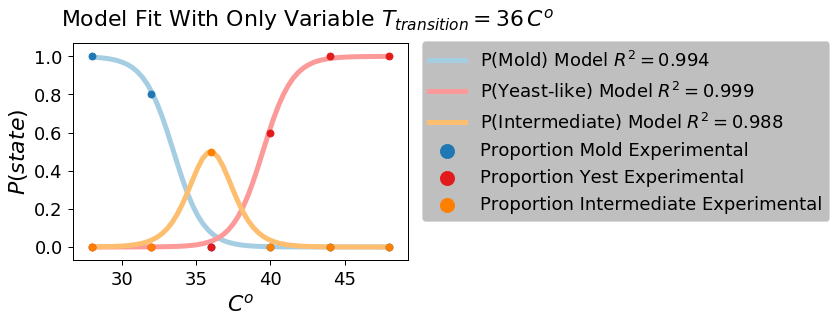

In [6]:
temp_ = np.linspace(28,48,60,endpoint=True)
exp_temp = np.linspace(28,48,6)

Rm = str(np.around(r2_score(pM,p_mold(exp_temp,T_0=33.5)),3))
Ry = str(np.around(r2_score(pY,p_yeast(exp_temp,T_0=39.5)),3))
Ri = str(np.around(r2_score(pI,p_intermediate(exp_temp,T_0=36)),3))


plt.scatter(exp_temp,pM,label='Proportion Mold Experimental',c='#1f78b4',s=50)
plt.plot(temp_,p_mold(temp_,T_0=33.5),label='P(Mold) Model $R^{2}='+Rm+'$',c='#a6cee3',zorder=0)
plt.scatter(exp_temp,pY,label='Proportion Yest Experimental',c='#e31a1c',s=50)
plt.plot(temp_,p_yeast(temp_,T_0=39.5),label='P(Yeast-like) Model $R^{2}='+Ry+'$',c='#fb9a99',zorder=0)
plt.scatter(exp_temp,pI,label='Proportion Intermediate Experimental',c='#ff7f00',s=50)
plt.plot(temp_,p_intermediate(temp_,T_0=36),label='P(Intermediate) Model $R^{2}='+Ri+'$',c='#fdbf6f',zorder=0)
plt.xlabel('$C^{o}$')
plt.ylabel('$P(state)$')
plt.legend(loc='upper center', 
                bbox_to_anchor=(1.65, 1.05),
                prop={'size':18},
                fancybox=True, framealpha=0.5,ncol=1
                , markerscale=2, facecolor="grey")
plt.title('Model Fit With Only Variable $T_{transition}=36\,C^{o}$',x=.7,y=1.05)
plt.savefig('figures/Fig_state_fit.png',dpi=300,bbox_inches = "tight")
plt.show()


# Mycelial Model

### simulation model

In [46]:
# average time to run is about 15-20 min per simulation 
N = 10
timehyN = {}
timesubN = {}
for n_ in range(N):
    timehy,timesub = hyphal_walk(k1=7.4,S0=.36e5,q=0.005,normal_theta=False).run_simulation()
    timehyN[n_] = timehy.copy()
    timesubN[n_] = timesub.copy()
save_obj(timehyN,'hyphal_subconst')
save_obj(timesubN,'sub_subconst')


100%|██████████| 1200/1200 [22:56<00:00,  1.15s/it]


In [47]:
timehyN = load_obj('hyphal_subconst')
timesubN = load_obj('sub_subconst')


In [51]:
width=100
tstep = .0005
r_t = {}
R_t = {}
for n_,timesub in timesubN.items():
    timehy = timehyN[n_]
    for t_ in range(0,max(timesub.keys())+1):
        if not t_%20:
            subt_ = timesub[t_]
            hypht_ = timehy[t_].to_dict()
            x_ = [hypplot['x'] for count_,hypplot in hypht_.items()]
            y_ = [hypplot['y'] for count_,hypplot in hypht_.items()]
            x_ = np.mean(x_)
            y_ = np.mean(y_)
            r_max = np.sqrt(x_**2+y_**2)
            r_t[round(t_*tstep*100)] = r_max   
    R_t[n_] = r_t
r_t_mean = pd.DataFrame(R_t).max(axis=1).to_dict().copy()


## analytical solution

In [49]:
### analytical sol numbers derived from Nemecek et al. ### 

# Kb
Kb = 1.38064852*10**-23
# temp 
T = 37
# Diff. D (from known values)
D = (4**2)/(6*60)
# friction
f = (Kb*T)/D


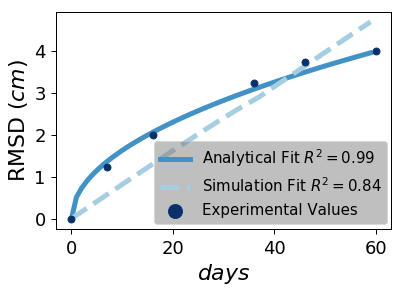

In [50]:

exp_time = [0,7,16,36,46,60]
r_cm = [0,1.25,2,3.25,3.75,4]
r2ana = str(np.around(r2_score(r_cm,[rmsd(D,t_) for t_ in exp_time]),2))
r2sim = str(np.around(r2_score(r_cm,[r_t_mean[t_] for t_ in abs(np.array(exp_time)-1)]),2))

plt.scatter(exp_time,r_cm,c='#08306b',s=50,label='Experimental Values')
plt.plot(range(0,60),[rmsd(D,t) for t in  range(0,60)],c='#4292c6',
         zorder=0,label='Analytical Fit $R^{2}=%s$'%r2ana)
plt.plot(list(r_t_mean.keys()),list(r_t_mean.values()),c='#a6cee3',
         ls='--',zorder=0,label='Simulation Fit $R^{2}=%s$'%r2sim)
plt.xlabel('$days$')
plt.ylabel('RMSD $(cm)$')
plt.legend(loc='upper center', 
                bbox_to_anchor=(.64, .44),
                prop={'size':15},
                fancybox=True, framealpha=0.5,ncol=1
                , markerscale=2, facecolor="grey")
plt.savefig('figures/analytical_solution.png',dpi=300, bbox_inches = "tight")
plt.show()



# Two-State and analytical solution integration


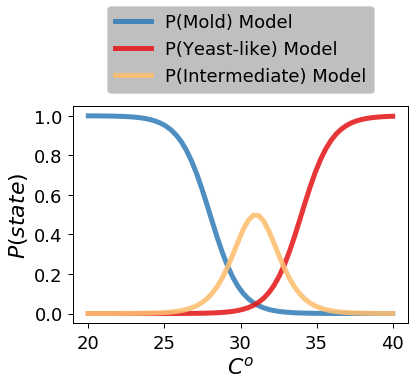

In [228]:
temp_ = np.linspace(20,40,60,endpoint=True)
plt.plot(temp_,p_mold(temp_,T_0=31-3),label='P(Mold) Model',c='#377eb8',alpha=.88,zorder=0)
plt.plot(temp_,p_yeast(temp_,T_0=31+3),label='P(Yeast-like) Model',c='#e41a1c',alpha=.88,zorder=0)
plt.plot(temp_,p_intermediate(temp_,T_0=31),label='P(Intermediate) Model',c='#fdbf6f',alpha=.88,zorder=0)
plt.xlabel('$C^{o}$')
plt.ylabel('$P(state)$')
plt.legend(loc='upper center', 
                bbox_to_anchor=(.5, 1.5),
                prop={'size':18},
                fancybox=True, framealpha=0.5,ncol=1
                , markerscale=2, facecolor="grey")
#plt.title('$Blastomyces\,\,dermatitidis$ two-state model',x=.7,y=1.05)
plt.savefig('figures/state_fit_blasto.png',dpi=300,bbox_inches = "tight")
plt.show()

In [215]:
### analytical sol numbers derived from Nemecek et al. ### 

# Kb
Kb = 1.38064852*10**-23
# temp 
T = 37
# Diff. D (from known values)
D = (4**2)/(6*60)
# friction
f = (Kb*T)/D


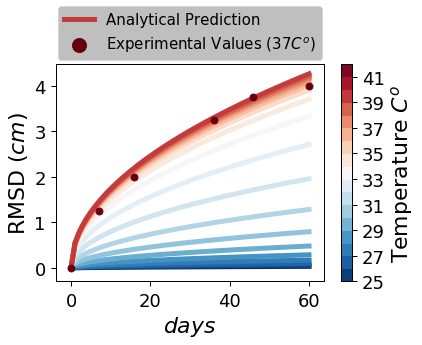

In [216]:
T_0=34
yeast_like_rsmd = {T_:[rmsd_yeast_state(T_,f,t_,34) for t_ in range(0,61)] for T_ in range(25,43)}
color=cm.RdBu_r(np.linspace(0,.9,len(yeast_like_rsmd.keys())+1))

CS3 = plt.contourf(np.array([[1,1],[0,1]]),range(25,43), cmap=cm.RdBu_r)
plt.clf()

for (T_,r_),(count_,clr_) in zip(yeast_like_rsmd.items(),enumerate(color)):
    if count_==(len(yeast_like_rsmd)-1):
        plt.plot(range(0,61),r_,c=clr_,zorder=0,
                 label='Analytical Prediction')
    else:
        plt.plot(range(0,61),r_,c=clr_,zorder=0)
plt.scatter(time,r_cm,c='#67000d',s=50,
            label='Experimental Values (37$C^{o}$)')
cbar = plt.colorbar(CS3,shrink=1.0)
cbar.set_label('Temperature $C^{o}$', fontsize=22)
plt.xlabel('$days$')
plt.ylabel('RMSD $(cm)$')
plt.legend(loc='upper center', 
                bbox_to_anchor=(.5, 1.3),
                prop={'size':15},
                fancybox=True, framealpha=0.5,ncol=1
                , markerscale=2, facecolor="grey")
plt.savefig('figures/analytical_sol_temp.png',dpi=300, bbox_inches = "tight")
plt.show()
    